In [41]:
import torch
import os
import pandas as pd
import numpy as np

os.chdir('F:\\workspace\\pathology\\gigapath')

In [3]:
df = pd.DataFrame({
    'id': [f"sample_{i:04d}" for i in range(1, 201)],
    'slide_addr': [f"data/wsi/sample_{i:03d}.svs" for i in range(1, 201)],
    'tumour_type': np.random.choice(['glioma', 'ependymoma', 'glioblastoma', 'meningioma', 'normal'], 200),
    'duration': np.random.gamma(1.5, 24, 200).astype(int),
    'IDH1': np.random.choice([0, 1], 200),
    'TP53': np.random.choice([0, 1], 200),
    'ATRX': np.random.choice([0, 1], 200),
    'PTEN': np.random.choice([0, 1], 200),
    'EGFR': np.random.choice([0, 1], 200),
    'TERT': np.random.choice([0, 1], 200),
    'created_date': pd.date_range('2014-01-01', periods=200, freq='D'),
    'quality_score': np.random.uniform(0.5, 1.0, 200)
})

df.to_csv('data\\metadata.tbl', sep='\t', index=False)
df

,id,slide_addr,tumour_type,duration,IDH1,TP53,ATRX,PTEN,EGFR,TERT,created_date,quality_score
0,sample_0001,data/wsi/sample_001.svs,glioma,33,1,0,0,0,0,0,2014-01-01,0.624452
1,sample_0002,data/wsi/sample_002.svs,glioma,17,1,0,1,1,0,1,2014-01-02,0.554902
2,sample_0003,data/wsi/sample_003.svs,ependymoma,62,1,1,1,1,0,1,2014-01-03,0.583946
3,sample_0004,data/wsi/sample_004.svs,normal,6,0,0,0,1,0,0,2014-01-04,0.923632
4,sample_0005,data/wsi/sample_005.svs,glioma,4,0,1,1,1,0,1,2014-01-05,0.929606
...,...,...,...,...,...,...,...,...,...,...,...,...
195,sample_0196,data/wsi/sample_196.svs,glioma,43,1,1,0,0,0,0,2014-07-15,0.757499
196,sample_0197,data/wsi/sample_197.svs,ependymoma,14,0,0,0,0,0,0,2014-07-16,0.787060
197,sample_0198,data/wsi/sample_198.svs,ependymoma,22,1,1,1,0,0,0,2014-07-17,0.572767
198,sample_0199,data/wsi/sample_199.svs,meningioma,61,1,0,1,0,0,0,2014-07-18,0.574387


In [42]:
ts = torch.load('output\\tiles\\slide_embeds.pt')

C:\Users\Ge Yi-Lun\AppData\Local\Temp\ipykernel_3064\3624094937.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ts = torch.load('output\\tiles\\slide_embeds.pt')


In [43]:
type(ts)

dict

In [13]:
ts.keys()

dict_keys(['layer_0_embed', 'layer_1_embed', 'layer_2_embed', 'layer_3_embed', 'layer_4_embed', 'layer_5_embed', 'layer_6_embed', 'layer_7_embed', 'layer_8_embed', 'layer_9_embed', 'layer_10_embed', 'layer_11_embed', 'layer_12_embed', 'last_layer_embed'])

In [17]:
ts['last_layer_embed'].size()

torch.Size([1, 768])

## generate slides embeddings

In [19]:
samples = [f"sample_{i:03d}" for i in range(1, 101)]
ts = {}
for idx, sample in enumerate(samples):
    ts[sample] = torch.rand(1, 1536)

torch.save(ts, 'output\\all_slides_embeds.pt')

## generate metadata df

In [39]:
np.random.gamma(1.5, 24, 100).astype(int)

array([ 61,  74, 106,  59,  25,  40,  22,  49,  47,  51,  77,  39,   9,
        28,  22,  27,   8,  45,   3,  25,  29,  53,  85,  10,  27,  16,
         9,   9,  99,   4,  51, 134,   8,  33,  13,   8,  40,  20,   2,
        22,  57,  23,  11,  46,  14,  29,  26,  76,  68,  36,  57,  34,
        22,  71,  17,  12,  23,  41,  26,   3,  35,  53,   4,  65,   3,
         9,  12,  53,  12,  33,  42,  38,  40,  50,  22,  66,  14,  12,
        25,   6,  22,   2,  18,  62,  33,  69,  60,  36,   1,  10,  46,
         2,  28,  97,  16,   1,  76,  38,  73,  29])

(array([38., 24., 20., 10.,  3.,  3.,  0.,  1.,  0.,  1.]),
 array([  0. ,  20.8,  41.6,  62.4,  83.2, 104. , 124.8, 145.6, 166.4,
        187.2, 208. ]),
 <BarContainer object of 10 artists>)

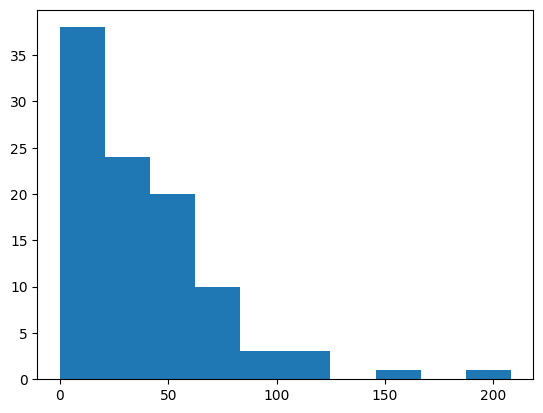

In [40]:
import matplotlib.pyplot as plot
plot.hist(np.random.gamma(1.5, 24, 100).astype(int))

In [55]:
df

,id,slide_addr,tumour_type,duration,IDH1,TP53,ATRX,PTEN,EGFR,TERT,created_date,quality_score
0,sample_001,data/wsi/sample_001.svs,normal,55,0,1,1,0,0,0,2014-01-01,0.680746
1,sample_002,data/wsi/sample_002.svs,glioma,4,1,0,0,1,0,0,2014-01-02,0.569233
2,sample_003,data/wsi/sample_003.svs,glioblastoma,4,0,1,1,0,0,0,2014-01-03,0.702853
3,sample_004,data/wsi/sample_004.svs,glioblastoma,71,0,0,1,1,0,1,2014-01-04,0.933516
4,sample_005,data/wsi/sample_005.svs,glioma,52,0,1,0,0,1,0,2014-01-05,0.888683
...,...,...,...,...,...,...,...,...,...,...,...,...
95,sample_096,data/wsi/sample_096.svs,glioblastoma,16,0,1,1,1,1,0,2014-04-06,0.570922
96,sample_097,data/wsi/sample_097.svs,glioma,30,1,1,0,0,0,0,2014-04-07,0.575415
97,sample_098,data/wsi/sample_098.svs,glioblastoma,62,0,0,0,1,0,1,2014-04-08,0.810377
98,sample_099,data/wsi/sample_099.svs,glioblastoma,16,1,1,1,1,0,1,2014-04-09,0.577218


In [5]:
df0 = df[['IDH1','TP53','ATRX','PTEN','EGFR','TERT']]
np.array(df0)

array([[1, 0, 1, 1, 0, 1],
       [1, 1, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 1, 1],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 1],
       [0, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 1, 0],
       [1, 0, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 1, 0],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 1],
       [0, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 0, 1],
       [1, 1, 0, 0, 1, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 1],
       [0, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 1, 0],
 

In [7]:
df0.values == np.array(df0)

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  T

## make duplications of tile embeddings

In [6]:
os.path.exists('output\\tiles\\tile_encoder_outputs.pt')

True

In [12]:
import shutil

original_file = 'output\\tiles\\tile_encoder_outputs.pt'
ts = torch.load(original_file)
ts.keys()

C:\Users\Ge Yi-Lun\AppData\Local\Temp\ipykernel_3064\3082560597.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ts = torch.load(original_file)


dict_keys(['tile_embeds', 'coords'])

In [39]:
ts['tile_embeds']

tensor([[ 0.4090, -0.1391, -0.2556,  ..., -0.2290,  0.2953, -0.8520],
        [ 0.3132,  0.8471,  0.1403,  ..., -1.7399,  0.1263, -0.0331],
        [ 0.2986,  1.5032,  0.1012,  ..., -0.8808, -0.1036, -0.3944],
        ...,
        [ 0.7511,  0.9327,  0.0103,  ..., -0.5870, -0.5150, -0.6471],
        [-0.4446,  0.1841,  0.6322,  ..., -1.4399,  0.1305, -0.0746],
        [ 0.5457,  1.2360, -0.6759,  ..., -1.1406,  0.2277, -1.0166]])

In [40]:
ts['coords']

tensor([[ 3072., 12416.],
        [ 3072., 12928.],
        [ 3072., 13440.],
        ...,
        [85504., 11904.],
        [86016., 10880.],
        [86016., 11392.]])

In [30]:
ts['tile_embeds'].shape

torch.Size([1068, 1536])

In [35]:
type(ts['tile_embeds'][2,20])

torch.Tensor

In [25]:
ts['coords']

tensor([[ 3072., 12416.],
        [ 3072., 12928.],
        [ 3072., 13440.],
        ...,
        [85504., 11904.],
        [86016., 10880.],
        [86016., 11392.]])

(array([2.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00, 6.0000e+00,
        1.1000e+01, 1.4000e+01, 1.3000e+01, 3.3000e+01, 3.2000e+01,
        4.5000e+01, 7.3000e+01, 1.1600e+02, 1.3400e+02, 2.1700e+02,
        2.8600e+02, 4.3400e+02, 5.4300e+02, 6.6700e+02, 8.8700e+02,
        1.1630e+03, 1.6000e+03, 1.8620e+03, 2.3260e+03, 3.1310e+03,
        3.8550e+03, 4.8520e+03, 5.9820e+03, 7.4680e+03, 8.9770e+03,
        1.0539e+04, 1.2699e+04, 1.5446e+04, 1.8320e+04, 2.1605e+04,
        2.4701e+04, 2.8571e+04, 3.2449e+04, 3.6885e+04, 4.1624e+04,
        4.6223e+04, 5.1493e+04, 5.5814e+04, 6.0404e+04, 6.4755e+04,
        6.8798e+04, 7.1645e+04, 7.4318e+04, 7.5822e+04, 7.5732e+04,
        7.3457e+04, 7.0936e+04, 6.6444e+04, 6.1885e+04, 5.6984e+04,
        5.2211e+04, 4.6670e+04, 4.1727e+04, 3.6921e+04, 3.2347e+04,
        2.7915e+04, 2.4146e+04, 2.0484e+04, 1.7321e+04, 1.4627e+04,
        1.2251e+04, 1.0351e+04, 8.3840e+03, 6.9480e+03, 5.5500e+03,
        4.3160e+03, 3.5750e+03, 2.8780e+03, 2.25

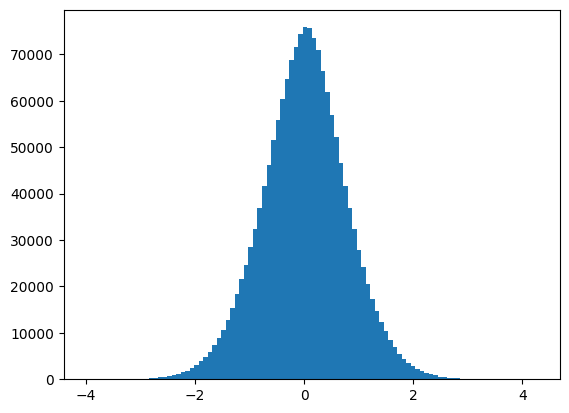

In [21]:
import matplotlib.pyplot as plt
plt.hist(ts['tile_embeds'].flatten(), bins=100)

In [24]:
print(np.std(ts['tile_embeds'].flatten().numpy()), np.mean(ts['tile_embeds'].flatten().numpy()))

0.7723646 0.0069160354


In [ ]:


for i in range(1, 201):
    new_filename = f"sample_{i:04d}.pt"
    shutil.copy(original_file, new_filename)

print("Done! Created 100 copies.")